In [13]:
# Data collection from kaggle
import pandas as pd

df = pd.read_csv('C:\\Users\\deeks\\Downloads\\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
#Data cleaning
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Matplotlib is building the font cache; this may take a moment.


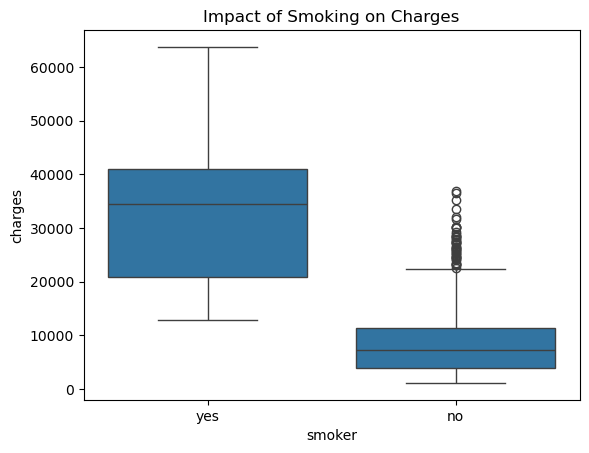

<Axes: >

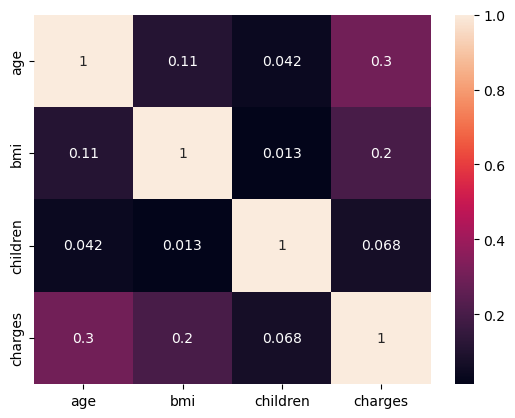

In [17]:
#Exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Impact of Smoking on Charges")
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True)

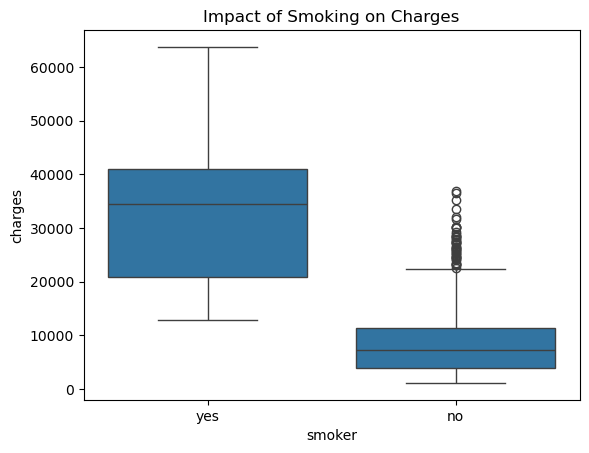

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Impact of Smoking on Charges")
plt.show()

#sns.heatmap(df.corr(numeric_only=True), annot=True)

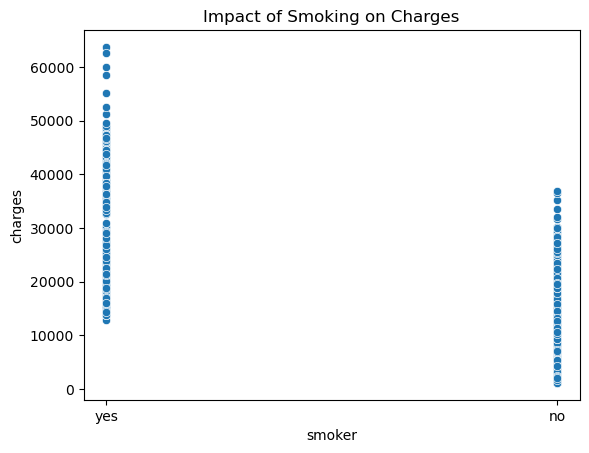

<Axes: >

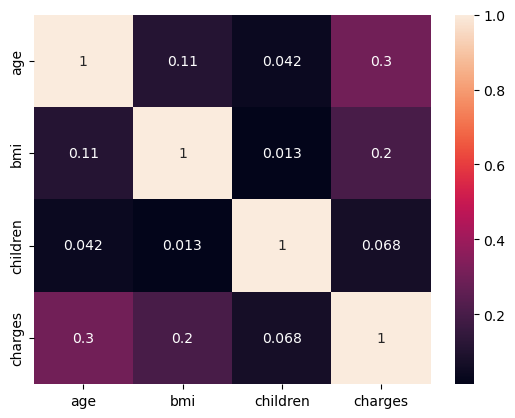

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='smoker', y='charges', data=df)
plt.title("Impact of Smoking on Charges")
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True)


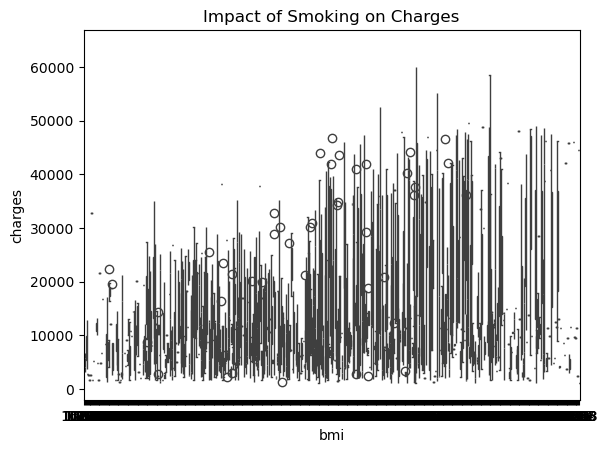

<Axes: >

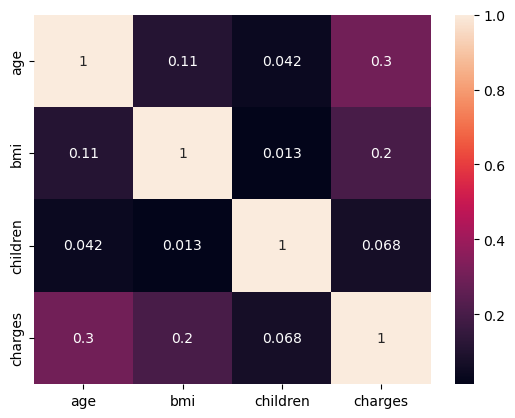

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='bmi', y='charges', data=df)
plt.title("Impact of Smoking on Charges")
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True)

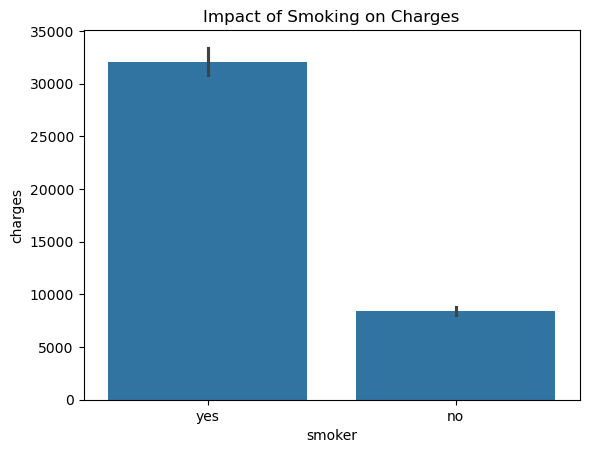

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='smoker', y='charges', data=df)
plt.title("Impact of Smoking on Charges")
plt.show()

#sns.heatmap(df.corr(numeric_only=True), annot=True)

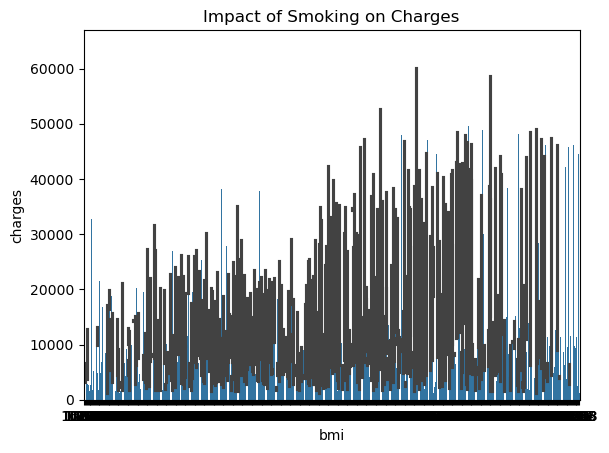

<Axes: >

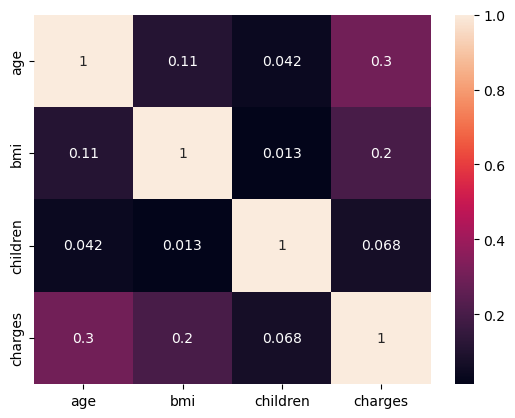

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='bmi', y='charges', data=df)
plt.title("Impact of Smoking on Charges")
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True)

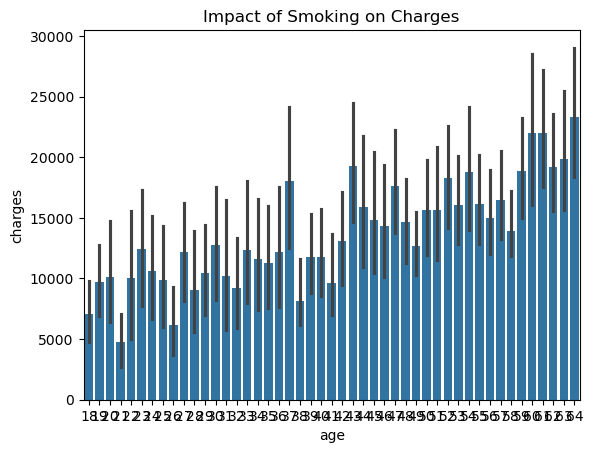

<Axes: >

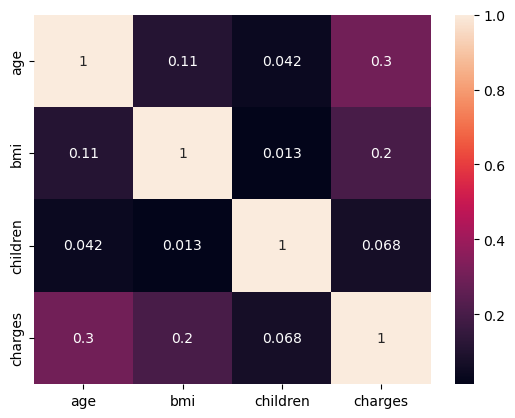

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='age', y='charges', data=df)
plt.title("Impact of Smoking on Charges")
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True)

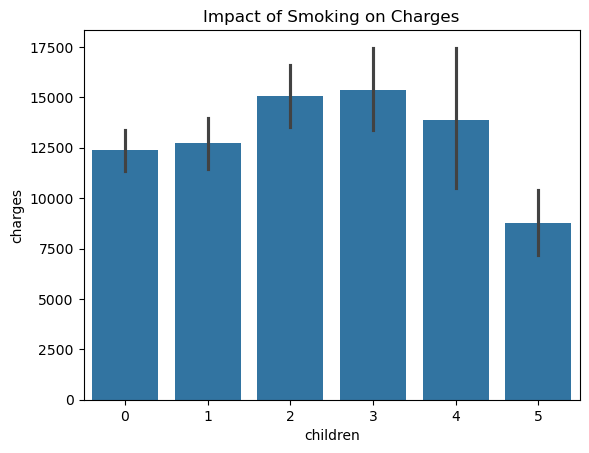

<Axes: >

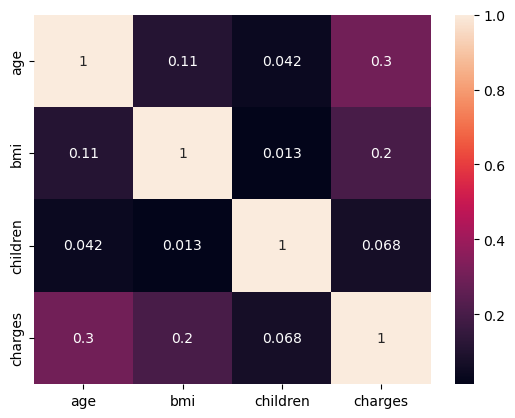

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='children', y='charges', data=df)
plt.title("Impact of Smoking on Charges")
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True)

In [79]:
df = pd.get_dummies(df, drop_first=True)
#df.head()
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df is your DataFrame and X contains the features
numerical_features = ['age', 'bmi', 'children']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


In [39]:
# Interaction terms
df['age_smoker'] = df['age'] * df['smoker_yes']
df['bmi_smoker'] = df['bmi'] * df['smoker_yes']

In [59]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, rmse, mae, r2))

# Display results
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R2 Score"])
print(results_df.sort_values(by="RMSE"))


               Model         RMSE          MAE  R2 Score
1   Ridge Regression  4562.451452  2760.083595  0.865919
4      Random Forest  4562.864104  2549.970430  0.865894
2   Lasso Regression  4574.035822  2757.833674  0.865237
0  Linear Regression  4574.123734  2757.759204  0.865232
3      Decision Tree  4856.010615  2872.286134  0.848109


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


X = df.drop('charges', axis=1)
y = df['charges']


In [65]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [67]:
# Predictions
y_pred = rf_model.predict(X_test)

In [69]:
# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Random Forest Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

✅ Random Forest Performance:
RMSE: 4562.86
MAE: 2549.97
R² Score: 0.87


In [85]:
import joblib

# Assuming your trained model is named `rf`
joblib.dump(rf_model, 'random_forest_model.joblib')
joblib.dump(scaler, 'scaler.joblib')              
features = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
            'region_northwest', 'region_southeast', 'region_southwest',
            'age_smoker', 'bmi_smoker']
joblib.dump(features, 'model_features.pkl')  

['model_features.pkl']